In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
from fbprophet.plot import plot_plotly
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import bq_helper
import pandas as pd
from bq_helper import BigQueryHelper
# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package
chicago_crime = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="chicago_crime")

Using Kaggle's public dataset BigQuery integration.


# Query datasets for top five crimes

In [42]:
queryTheft =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'THEFT'
 group by ds
 order by ds
 

        """
theft_day = chicago_crime.query_to_pandas_safe(queryTheft)

theft_day = theft_day[['ds', 'y']]

theft_day['ds'] = pd.to_datetime(theft_day['ds'])

theft_day.tail()

,ds,y
3598,2020-11-07,94
3599,2020-11-08,78
3600,2020-11-09,95
3601,2020-11-10,110
3602,2020-11-11,80


In [43]:
queryBattery =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'BATTERY'
 group by ds
 order by ds
 

        """
battery_day = chicago_crime.query_to_pandas_safe(queryBattery)

battery_day = battery_day[['ds', 'y']]
battery_day['ds'] = pd.to_datetime(battery_day['ds'])


battery_day.tail()

,ds,y
3598,2020-11-07,143
3599,2020-11-08,141
3600,2020-11-09,111
3601,2020-11-10,100
3602,2020-11-11,82


In [44]:
queryBattery =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'BATTERY'
 group by ds
 order by ds
 

        """
battery_day = chicago_crime.query_to_pandas_safe(queryBattery)

battery_day = battery_day[['ds', 'y']]
battery_day['ds'] = pd.to_datetime(battery_day['ds'])


battery_day.tail()

,ds,y
3598,2020-11-07,143
3599,2020-11-08,141
3600,2020-11-09,111
3601,2020-11-10,100
3602,2020-11-11,82


In [45]:
queryCriminalDamage =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'CRIMINAL DAMAGE'
 group by ds
 order by ds
 

        """
damage_day = chicago_crime.query_to_pandas_safe(queryCriminalDamage)

damage_day = damage_day[['ds', 'y']]

damage_day.tail()

,ds,y
3598,2020-11-07,70
3599,2020-11-08,64
3600,2020-11-09,64
3601,2020-11-10,57
3602,2020-11-11,49


In [46]:
queryNarcotics =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'ASSAULT'
 group by ds
 order by ds
 

        """
narcotics_day = chicago_crime.query_to_pandas_safe(queryNarcotics)

narcotics_day = narcotics_day[['ds', 'y']]
narcotics_day['ds'] = pd.to_datetime(narcotics_day['ds'])

narcotics_day.tail()



,ds,y
3598,2020-11-07,42
3599,2020-11-08,50
3600,2020-11-09,50
3601,2020-11-10,43
3602,2020-11-11,47


In [47]:
queryAssault =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'DECEPTIVE PRACTICE'
 group by ds
 order by ds
 

        """
assault_day = chicago_crime.query_to_pandas_safe(queryAssault)

assault_day = assault_day[['ds', 'y']]
assault_day['ds'] = pd.to_datetime(assault_day['ds'])

assault_day.tail()





,ds,y
3598,2020-11-07,50
3599,2020-11-08,12
3600,2020-11-09,62
3601,2020-11-10,60
3602,2020-11-11,30


# General prophet function usable on ALL datasets

In [48]:
#Theft
theft_train = theft_day.iloc[0:] #1000 treningsdager
#teft_test = theft_day.iloc[3500:]
theft_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
theft_m.fit(theft_train)
theft_future = theft_m.make_future_dataframe(periods=12, freq='D')
theft_forecast = theft_m.predict(theft_future)
#theft_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2020-11-01'),figsize=(28, 14), color='b')


In [49]:
#Battery
battery_train = battery_day.iloc[0:] #1000 treningsdager
#battery_test = battery_day.iloc[3500:]
battery_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
battery_m.fit(battery_train)
battery_future = battery_m.make_future_dataframe(periods=12, freq='D') 
battery_forecast = battery_m.predict(battery_future)
#battery_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2020-11-01'),figsize=(28, 14), color='r')



In [50]:
#CRIMINAL DAMAGE
cd_train = damage_day.iloc[0:] #1000 treningsdager
#cd_test = damage_day.iloc[3500:]
cd_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
cd_m.fit(cd_train)
cd_future = cd_m.make_future_dataframe(periods=12, freq='D') 
cd_forecast = cd_m.predict(cd_future)
#cd_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2020-11-01'),figsize=(28, 14), color='y')

In [51]:
#NARCOTICS
narcotics_train = narcotics_day.iloc[0:] #1000 treningsdager
narcotics_test = narcotics_day.iloc[3500:]
narcotics_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
narcotics_m.fit(narcotics_train)
narcotics_future = narcotics_m.make_future_dataframe(periods=12, freq='D') 
narcotics_forecast = narcotics_m.predict(narcotics_future)
#narcotics_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet',linestyle='dashed', legend=True,xlim=('2020-10-01', '2020-10-01'),figsize=(28, 14), color='g')



In [52]:
#ASSAULT
assault_train = assault_day.iloc[0:] #1000 treningsdager
assault_test = assault_day.iloc[3500:]
assault_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
assault_m.fit(assault_train)
assault_future = assault_m.make_future_dataframe(periods=12, freq='D') 
assault_forecast = assault_m.predict(assault_future)



# Battery and Criminal Damage short term forecasting with confidence interval

In [53]:
assault_filtered = assault_forecast[assault_forecast['ds'] >= '2020-11-01']
narcotics_filtered = narcotics_forecast[narcotics_forecast['ds'] >= '2020-11-01']
cd_filtered = cd_forecast[cd_forecast['ds'] >= '2020-11-01']
battery_filtered = battery_forecast[battery_forecast['ds'] >= '2020-11-01']
theft_filtered = theft_forecast[theft_forecast['ds'] >= '2020-11-01']



fig = make_subplots(specs=[[{"secondary_y": False}]])

#fig = fig.add_trace(go.Scatter(x=assault_filtered['ds'], y=assault_filtered['yhat_lower'],
#                               mode='lines',
#                               marker=dict(color="#BF7FBF"),
#                               line=dict(width=0),
#                               name=''))
#
#fig = fig.add_trace(go.Scatter(x=assault_filtered['ds'], y=assault_filtered['yhat_upper'],
#                               mode='lines',
#                               marker=dict(color="#BF7FBF"),
#                               line=dict(width=0),
#                               fillcolor='rgba(204,153,204, 0.1)',
#                               fill='tonexty',
#                               name='Deceptive Practice Forecast Bound'))
#
#fig = fig.add_trace(go.Scatter(x=assault_filtered['ds'], y=assault_filtered['yhat'],
#                               mode='lines',
#                               line=dict(color='#800080'),
#                               fillcolor='rgba(204,153,204, 0.1)', 
#                               fill='tonexty',
#                               name='Deceptive Practice Forecast'))
#
#
##
#fig = fig.add_trace(go.Scatter(x=narcotics_filtered['ds'], y=narcotics_filtered['yhat_lower'],
#                               mode='lines',
#                               marker=dict(color="#7FBF7F"),
#                               line=dict(width=0),
#                               name=''))
#
#fig = fig.add_trace(go.Scatter(x=narcotics_filtered['ds'], y=narcotics_filtered['yhat_upper'],
#                               mode='lines',
#                               marker=dict(color="#7FBF7F"),
#                               line=dict(width=0),
#                               fillcolor='rgba(153,204,153, 0.1)',
#                               fill='tonexty',
#                               name='Assault Forecast Bound'))
#
#fig = fig.add_trace(go.Scatter(x=narcotics_filtered['ds'], y=narcotics_filtered['yhat'],
#                               mode='lines',
#                               line=dict(color='#008000'),
#                               fillcolor='rgba(153,204,153, 0.1)',
#                               fill='tonexty',
#                               name='Assault Forecast'))
#

#
fig = fig.add_trace(go.Scatter(x=cd_filtered['ds'], y=cd_filtered['yhat_lower'],
                               mode='lines',
                               marker=dict(color="#E7AB7A"),
                               line=dict(width=0),
                               name=''))

fig = fig.add_trace(go.Scatter(x=cd_filtered['ds'], y=cd_filtered['yhat_upper'],
                               mode='lines',
                               marker=dict(color="#E7AB7A"),
                               line=dict(width=0),
                               fillcolor='rgba(243,213,188, 0.3)',
                               fill='tonexty',
                               name='CRIMINAL DAMAGE BOUND'))

fig = fig.add_trace(go.Scatter(x=cd_filtered['ds'], y=cd_filtered['yhat'],
                               mode='lines',
                               line=dict(color='#E7AB7A'),
                               fillcolor='rgba(243,213,188, 0.3)',
                               fill='tonexty',
                               name='CRIMINAL DAMAGE'))

#Battery
fig = fig.add_trace(go.Scatter(x=battery_filtered['ds'], y=battery_filtered['yhat_lower'],
                               mode='lines',
                               marker=dict(color="#274950"),
                               line=dict(width=0),
                               name=''))

fig = fig.add_trace(go.Scatter(x=battery_filtered['ds'], y=battery_filtered['yhat_upper'],
                               mode='lines',
                               marker=dict(color="#274950"),
                               line=dict(width=0),
                               fillcolor='rgba(190,200,202,0.3)',
                               fill='tonexty',
                               name='BATTERY BOUND'))

fig = fig.add_trace(go.Scatter(x=battery_filtered['ds'], y=battery_filtered['yhat'],
                               mode='lines',
                               line=dict(color='#274950'),
                               fillcolor='rgba(190,200,202,0.3)',
                               fill='tonexty',
                               name='BATTERY'))
##274950 #E7AB7A

##Theft
#fig = fig.add_trace(go.Scatter(x=theft_filtered['ds'], y=theft_filtered['yhat_lower'],
#                               mode='lines',
#                               marker=dict(color="#6666FF"),
#                               line=dict(width=0),
#                               name=''))
#
#fig = fig.add_trace(go.Scatter(x=theft_filtered['ds'], y=theft_filtered['yhat_upper'],
#                               mode='lines',
#                               marker=dict(color="#6666FF"),
#                               line=dict(width=0),
#                               fillcolor='rgba(50,50,255, 0.1)',
#                               fill='tonexty',
#                               name='Theft Forecast Bound'))
#
#fig = fig.add_trace(go.Scatter(x=theft_filtered['ds'], y=theft_filtered['yhat'],
#                               mode='lines',
#                               line=dict(color='#0000ff'),
#                               fillcolor='rgba(50,50,255, 0.1)',
#                               fill='tonexty',
#                               name='Theft Forecast'))

fig.update_yaxes(title_text="Count", range=[30, 165])
fig.update_xaxes(title_text="Date")
fig.layout.plot_bgcolor = '#fff'

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#A6A6A6')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#A6A6A6')


fig.update_layout(height=1500, width=1900)
fig.update_layout(
    font=dict(
        size=24,
    )
)


fig.show()

# Battery Forecast with uncertainty and real observations

In [54]:
assaultFig = plot_plotly(battery_m,battery_forecast)
assaultFig.update_yaxes(title_text="Crimes per day", range=[60, 300])
assaultFig.update_layout(height=1000, width=1300)
assaultFig.show()

# # # Long term forecast half year

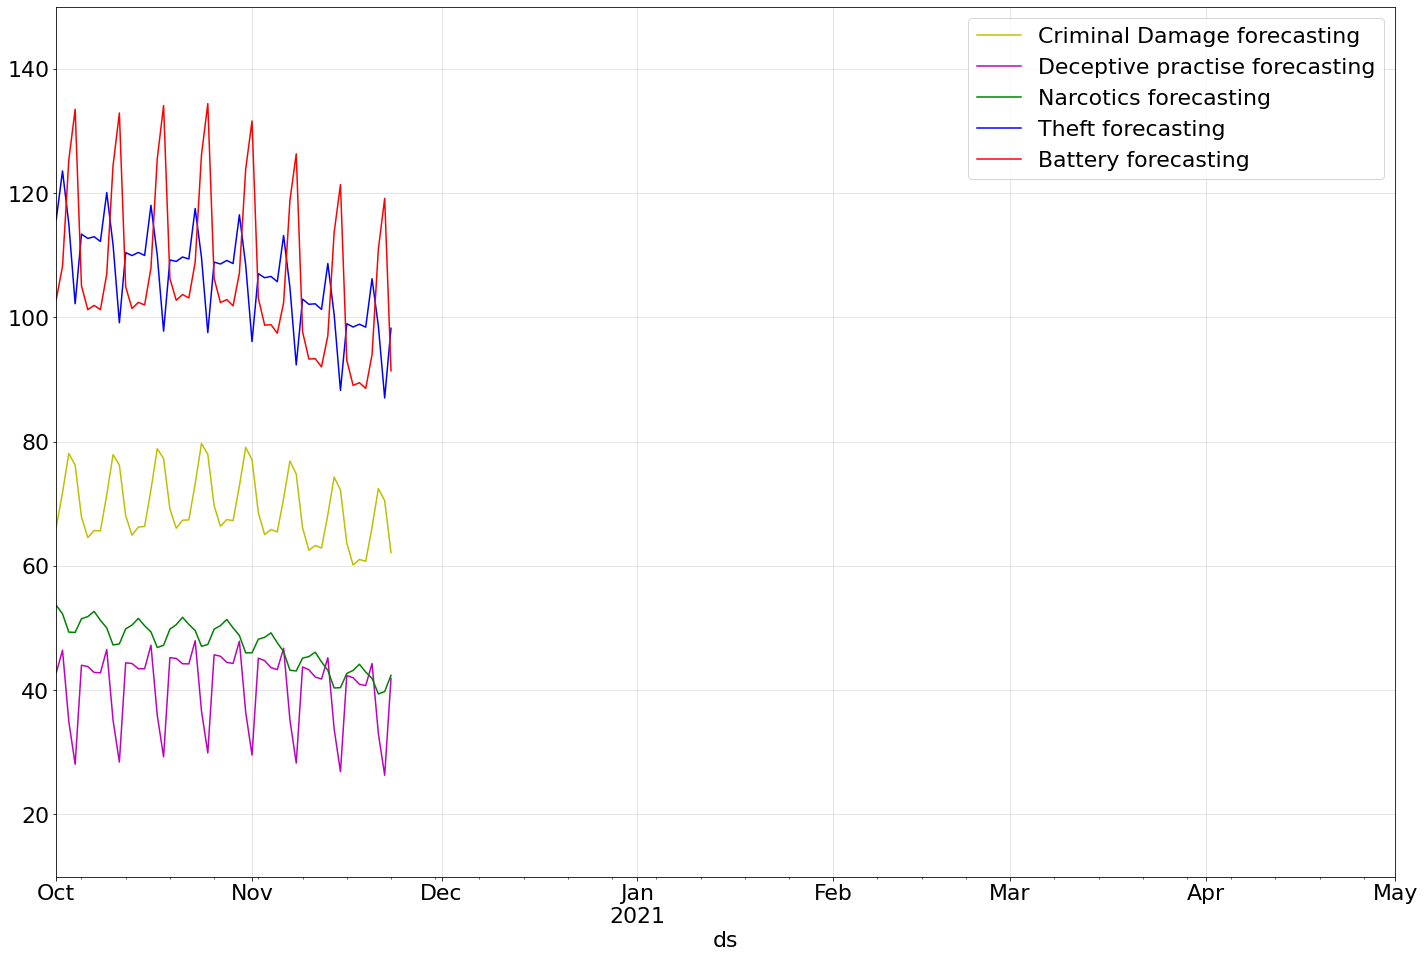

In [55]:
ax = cd_forecast.plot(x='ds', y='yhat', label='Criminal Damage forecasting', legend=True,xlim=('2020-10-01', '2021-05-01'),figsize=(24, 16), color='y')
ax.set_ylim(10,150)
ax1 = assault_forecast.plot(x='ds', y='yhat', label='Deceptive practise forecasting', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax,figsize=(24, 16), color='m')
ax2 = narcotics_forecast.plot(x='ds', y='yhat', label='Narcotics forecasting', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax1,figsize=(24, 16), color='g')
ax3 = theft_forecast.plot(x='ds', y='yhat', label='Theft forecasting', legend=True,xlim=('2020-10-01', '2021-05-01'), ax=ax2, figsize=(24, 16), color='b')
ax4 = battery_forecast.plot(x='ds', y='yhat', label='Battery forecasting', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax3, figsize=(24, 16), color='r')
ax4.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)


plt.show()

# 1. # Short Term Forecast 2 weeks

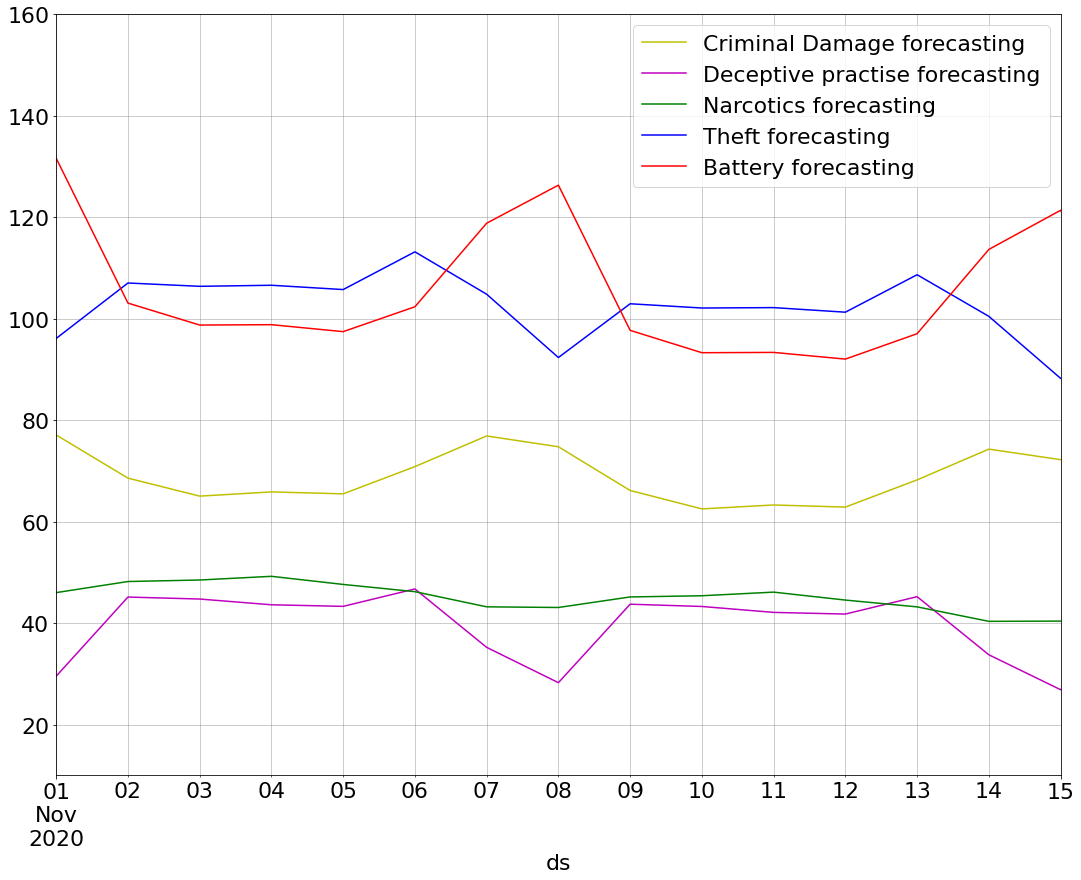

In [56]:
ax = cd_forecast.plot(x='ds', y='yhat', label='Criminal Damage forecasting', legend=True,xlim=('2020-11-01', '2020-11-15'),figsize=(18, 14), color='y')
ax.set_ylim(10,160)

ax1 = assault_forecast.plot(x='ds', y='yhat', label='Deceptive practise forecasting', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax,figsize=(18, 14), color='m')
ax2 = narcotics_forecast.plot(x='ds', y='yhat', label='Narcotics forecasting', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax1,figsize=(18, 14), color='g')
ax3 = theft_forecast.plot(x='ds', y='yhat', label='Theft forecasting', legend=True,xlim=('2020-11-01', '2020-11-15'), ax=ax2, figsize=(18, 14), color='b')
ax4 = battery_forecast.plot(x='ds', y='yhat', label='Battery forecasting', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax3, figsize=(18, 14), color='r')
ax4.grid(True, which='both', c='gray', ls='-', lw=1, alpha=0.4)

plt.show()

In [57]:
#Resultat uten ekstern variabel
train = assault_day.iloc[0:3500] #1000 treningsdager
#crime_per_day.plot(x='ds', y='y', label='Antall', xlim=('2001-01-01', '2020-10-10'))
test = assault_day.iloc[3500:]
mNew = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
mNew.fit(train)


In [58]:
future = mNew.make_future_dataframe(periods=24, freq='MS') #Forecaster 92 dager "fram" i tid
forecast = mNew.predict(future)

In [59]:
nyFig = plot_plotly(mNew,forecast)
nyFig.show()

In [60]:
queryBattery2 =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'BATTERY'
 group by ds
 order by ds
 

        """
battery_day2 = chicago_crime.query_to_pandas_safe(queryBattery2)

battery_day2 = battery_day2[['ds', 'y']]
battery_day2['ds'] = pd.to_datetime(battery_day2['ds'])


In [61]:
len(battery_train)

3603

In [62]:
### Battery
battery_train2 = battery_day2.iloc[:3588] #1000 treningsdager
battery_test2 = battery_day2.iloc[3589:3596]
battery_m2 = Prophet(seasonality_mode='multiplicative')
battery_m2.fit(battery_train2)
battery_future2 = battery_m2.make_future_dataframe(periods=8, freq='D') #Forecaster 365 dager "fram" i tid
battery_forecast2 = battery_m2.predict(battery_future2)

# Battery Forecast with uncertainty bounds and true value

In [63]:

forecast1_filtered = battery_forecast2[battery_forecast2['ds'] >= '2020-10-29']

fig = make_subplots(specs=[[{"secondary_y": False}]])

fig = fig.add_trace(go.Scatter(x=forecast1_filtered['ds'], y=forecast1_filtered['yhat_lower'],
                               mode='lines',
                               marker=dict(color="#FFB2B2"),
                               line=dict(width=0),
                               name=''))

fig = fig.add_trace(go.Scatter(x=forecast1_filtered['ds'], y=forecast1_filtered['yhat_upper'],
                               mode='lines',
                               marker=dict(color="#FFB2B2"),
                               line=dict(width=0),
                               fillcolor='rgba(190,200,202,0.3)',
                               fill='tonexty',
                               name='Battery Forecast Bound'))

fig = fig.add_trace(go.Scatter(x=forecast1_filtered['ds'], y=forecast1_filtered['yhat'],
                               mode='lines',
                               line=dict(color='#274950'),
                               fillcolor='rgba(190,200,202,0.3)',
                               fill='tonexty',
                               name='Battery Forecast'))

fig = fig.add_trace(go.Scatter(x=battery_test2['ds'], y=battery_test2['y'], mode='lines+markers',
                               line=dict(color='#ff0000', width=0.8),
                               marker=dict(size=6),
                               name='True Value'))





                               
                               
                               
fig.update_yaxes(title_text="Count", range=[60, 170])
fig.update_xaxes(title_text="Date")

fig.update_layout(
    font=dict(
        size=24,
    )
)
fig.layout.plot_bgcolor = '#fff'

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#A6A6A6')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#A6A6A6')


fig.update_layout(height=1200)


fig.show()



fig.show()

# Forecast top five crimes colorblind friendliness 

In [64]:
queryTheft =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'THEFT'

 group by ds
 order by ds
 

        """
theft_day = chicago_crime.query_to_pandas_safe(queryTheft)

theft_day = theft_day[['ds', 'y']]

theft_day['ds'] = pd.to_datetime(theft_day['ds'])

theft_day.tail()

,ds,y
3598,2020-11-07,94
3599,2020-11-08,78
3600,2020-11-09,95
3601,2020-11-10,110
3602,2020-11-11,80


In [65]:
queryBattery =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010

 and primary_type = 'BATTERY'
 group by ds
 order by ds
 

        """
battery_day = chicago_crime.query_to_pandas_safe(queryBattery)

battery_day = battery_day[['ds', 'y']]
battery_day['ds'] = pd.to_datetime(battery_day['ds'])


battery_day.tail()

,ds,y
3598,2020-11-07,143
3599,2020-11-08,141
3600,2020-11-09,111
3601,2020-11-10,100
3602,2020-11-11,82


In [66]:
queryAssault =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'DECEPTIVE PRACTICE'

 group by ds
 order by ds
 

        """
assault_day = chicago_crime.query_to_pandas_safe(queryAssault)

assault_day = assault_day[['ds', 'y']]
assault_day['ds'] = pd.to_datetime(assault_day['ds'])

assault_day.tail()

queryNarcotics =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'ASSAULT'

 group by ds
 order by ds
 

        """
narcotics_day = chicago_crime.query_to_pandas_safe(queryNarcotics)

narcotics_day = narcotics_day[['ds', 'y']]
narcotics_day['ds'] = pd.to_datetime(narcotics_day['ds'])

narcotics_day.tail()

queryCriminalDamage =  """SELECT count(*) as y, DATE(date) as ds
 from
    bigquery-public-data.chicago_crime.crime
 where year > 2010
 and primary_type = 'CRIMINAL DAMAGE'

 group by ds
 order by ds
 

        """
damage_day = chicago_crime.query_to_pandas_safe(queryCriminalDamage)

damage_day = damage_day[['ds', 'y']]

damage_day.tail()



,ds,y
3598,2020-11-07,70
3599,2020-11-08,64
3600,2020-11-09,64
3601,2020-11-10,57
3602,2020-11-11,49


Model forecast fitting top five crimes area

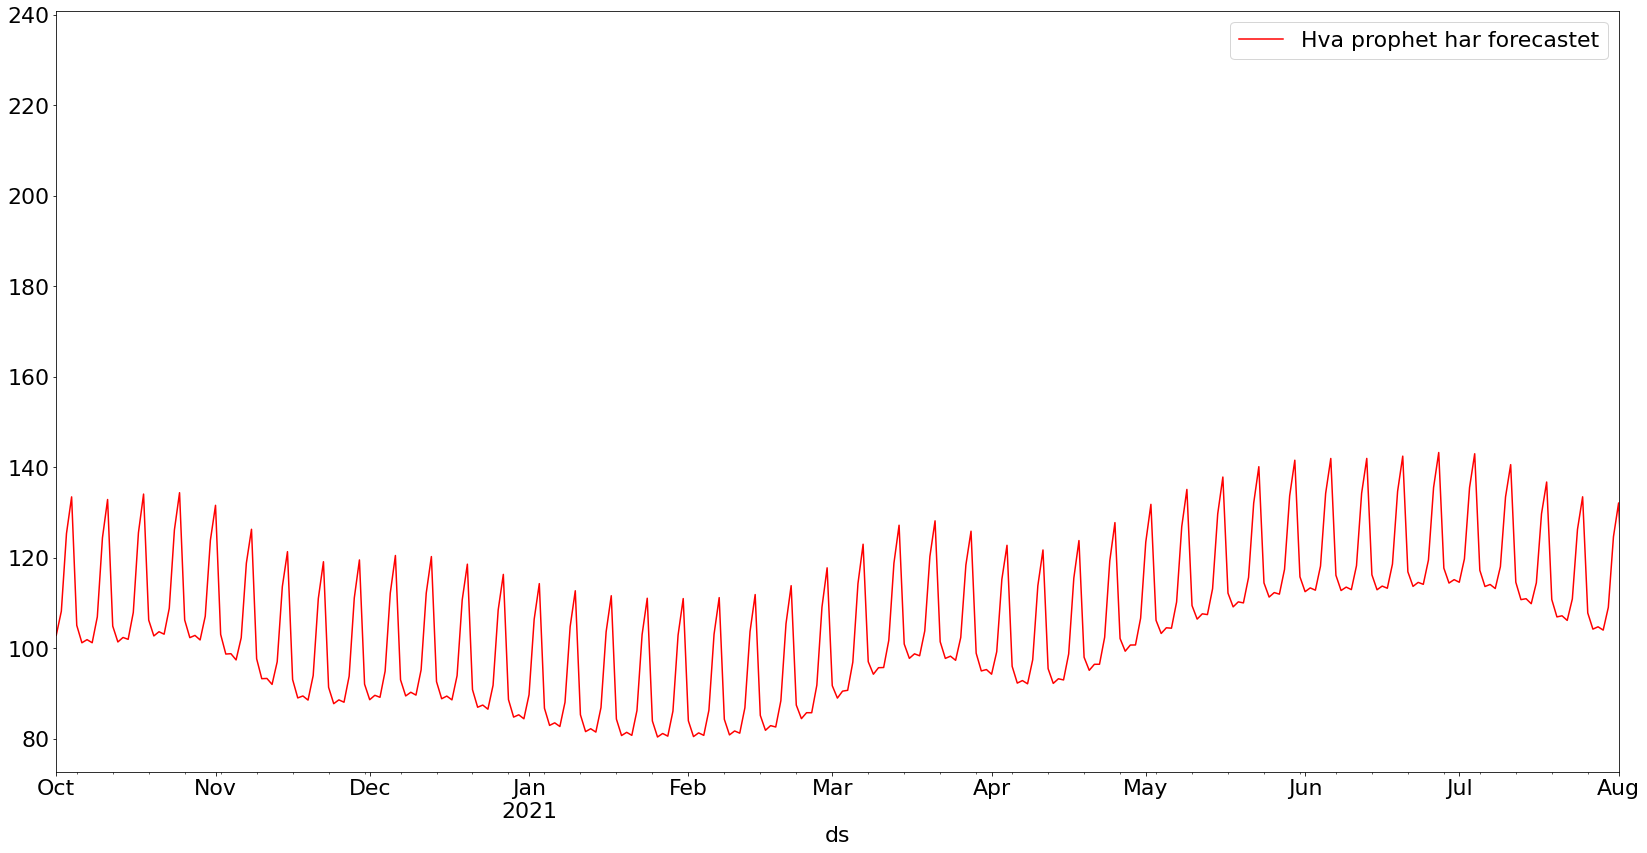

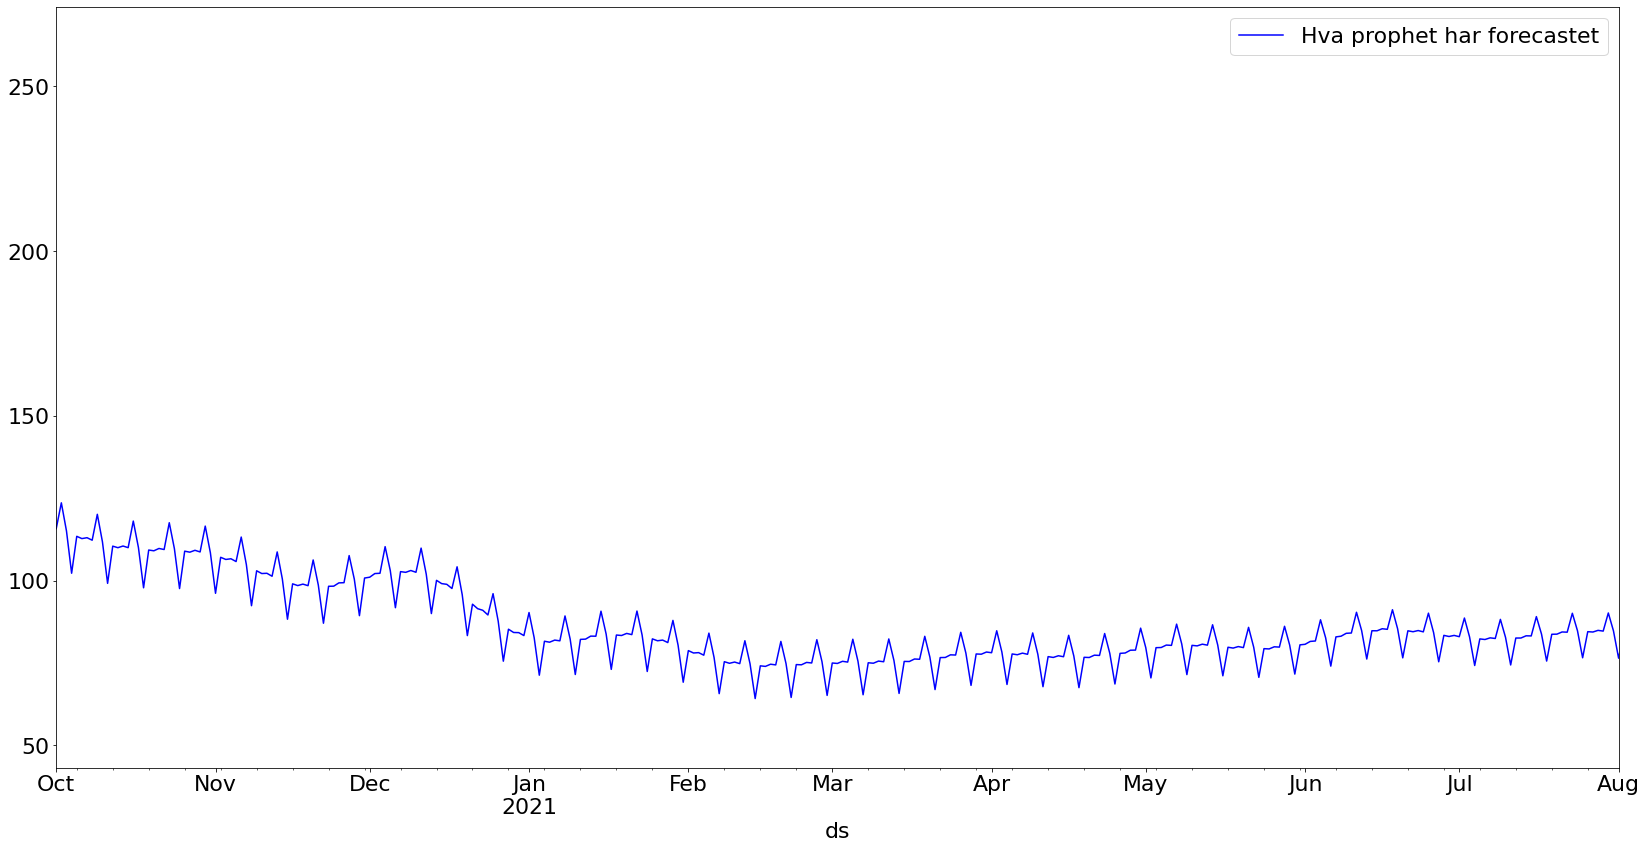

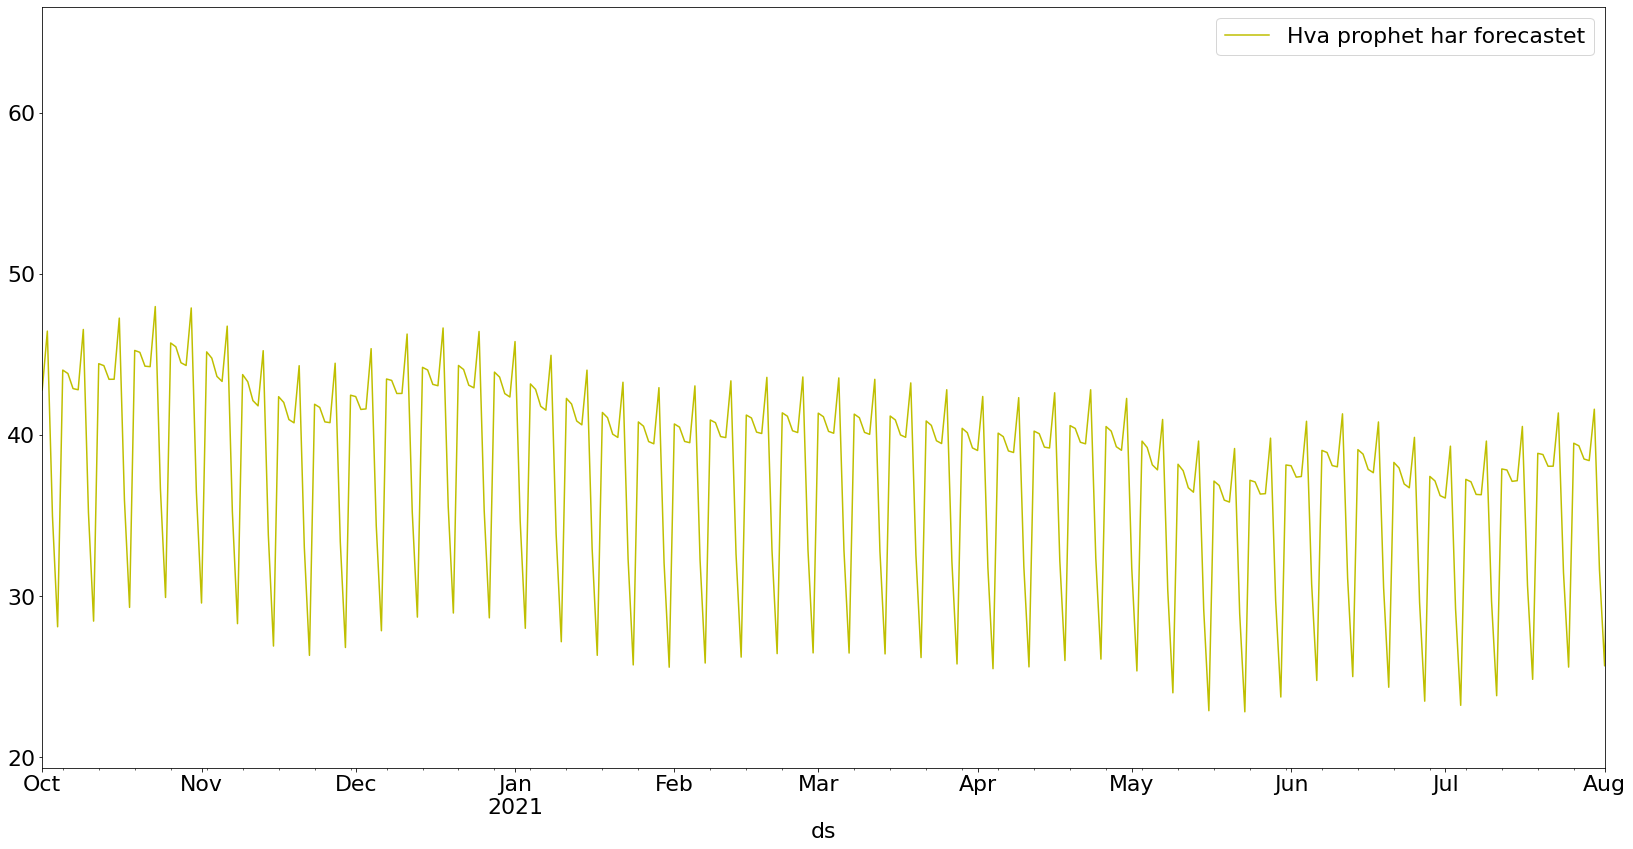

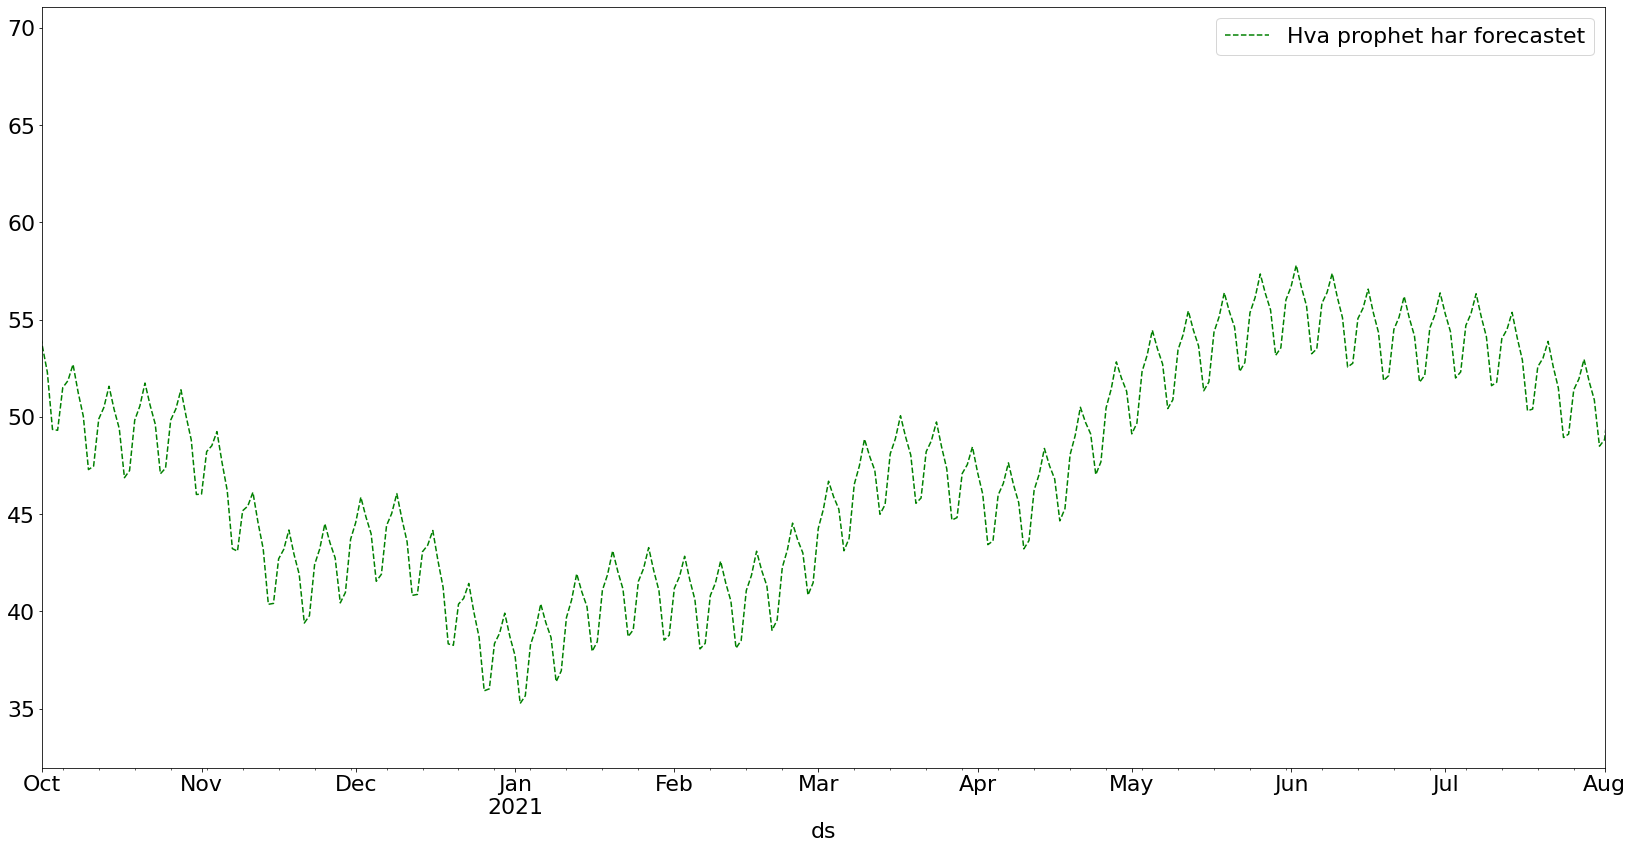

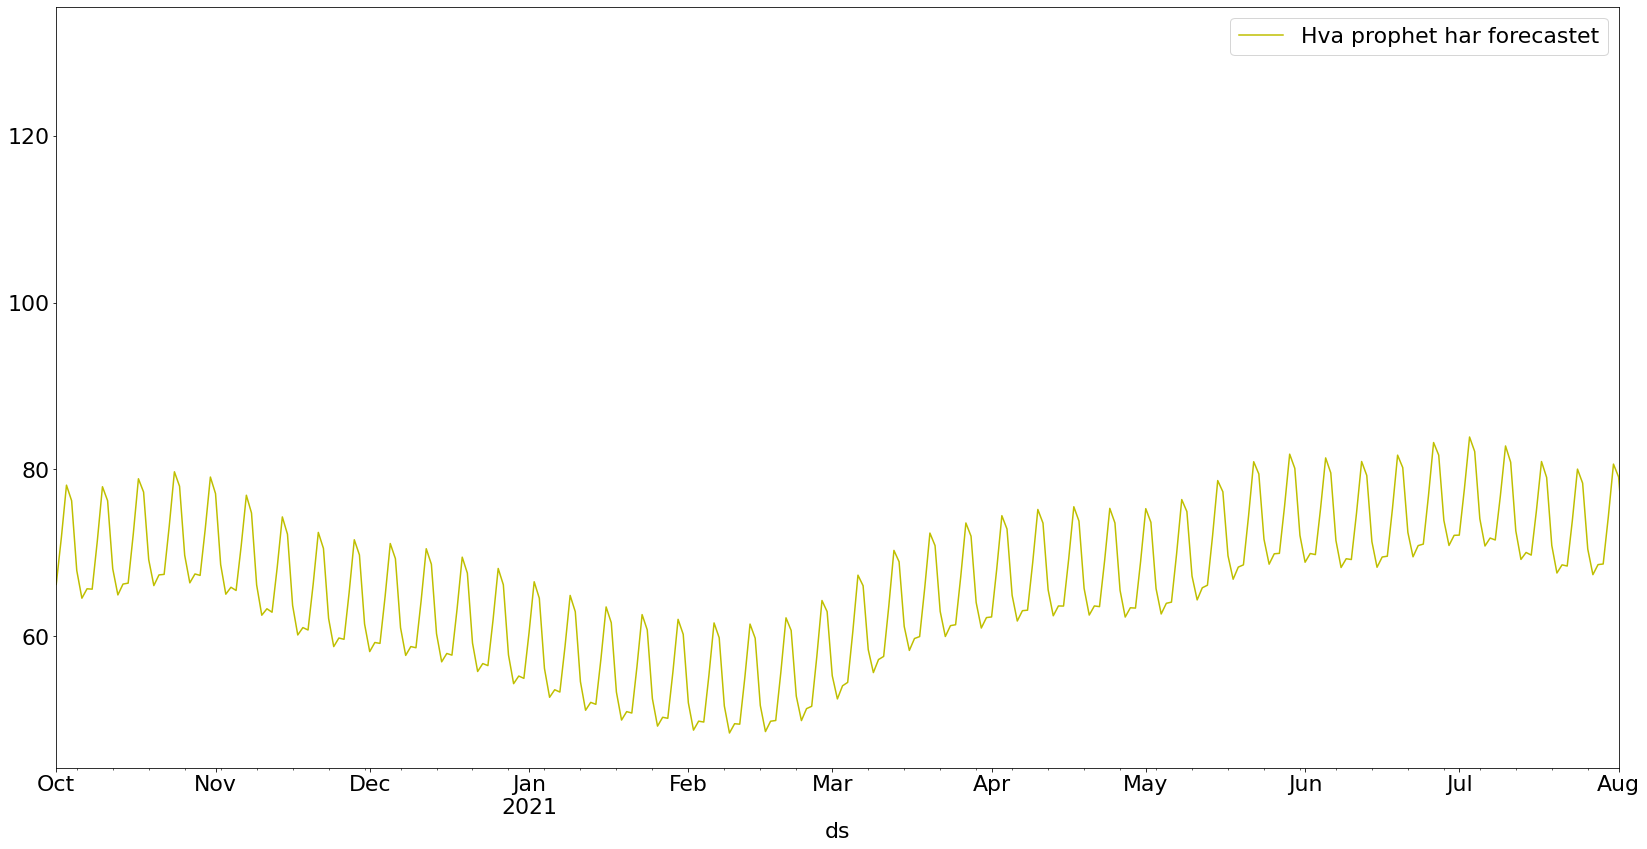

In [67]:
#Battery
battery_train = battery_day.iloc[0:] #1000 treningsdager
#battery_test = battery_day.iloc[3500:]
battery_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
battery_m.fit(battery_train)
battery_future = battery_m.make_future_dataframe(periods=365, freq='D') #Forecaster 365 dager "fram" i tid
battery_forecast = battery_m.predict(battery_future)
#battery_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2021-08-01'),figsize=(28, 14), color='r')

#Theft
theft_train = theft_day.iloc[0:] #1000 treningsdager
#teft_test = theft_day.iloc[3500:]
theft_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
theft_m.fit(theft_train)
theft_future = theft_m.make_future_dataframe(periods=365, freq='D') #Forecaster 92 dager "fram" i tid
theft_forecast = theft_m.predict(theft_future)
#theft_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2021-08-01'),figsize=(28, 14), color='b')

#ASSAULT
assault_train = assault_day.iloc[0:] #1000 treningsdager
assault_test = assault_day.iloc[3500:]
assault_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
assault_m.fit(assault_train)
assault_future = assault_m.make_future_dataframe(periods=365, freq='D') #Forecaster 92 dager "fram" i tid
assault_forecast = assault_m.predict(assault_future)
#assault_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2021-08-01'),figsize=(28, 14), color='y')

#NARCOTICS
narcotics_train = narcotics_day.iloc[0:] #1000 treningsdager
narcotics_test = narcotics_day.iloc[3500:]
narcotics_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
narcotics_m.fit(narcotics_train)
narcotics_future = narcotics_m.make_future_dataframe(periods=365, freq='D') #Forecaster 92 dager "fram" i tid
narcotics_forecast = narcotics_m.predict(narcotics_future)
#narcotics_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet',linestyle='dashed', legend=True,xlim=('2020-10-01', '2021-08-01'),figsize=(28, 14), color='g')

#CRIMINAL DAMAGE
cd_train = damage_day.iloc[0:] #1000 treningsdager
#cd_test = damage_day.iloc[3500:]
cd_m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, yearly_seasonality=True)
cd_m.fit(cd_train)
cd_future = cd_m.make_future_dataframe(periods=365, freq='D') #Forecaster 92 dager "fram" i tid
cd_forecast = cd_m.predict(cd_future)
#cd_forecast.plot(x='ds', y='yhat', label='Hva prophet har forecastet', legend=True,xlim=('2020-10-01', '2021-08-01'),figsize=(28, 14), color='y')

# Long term forecast

In [68]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': '22',
          'figure.figsize': (15, 5),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
pylab.rcParams.update(params)

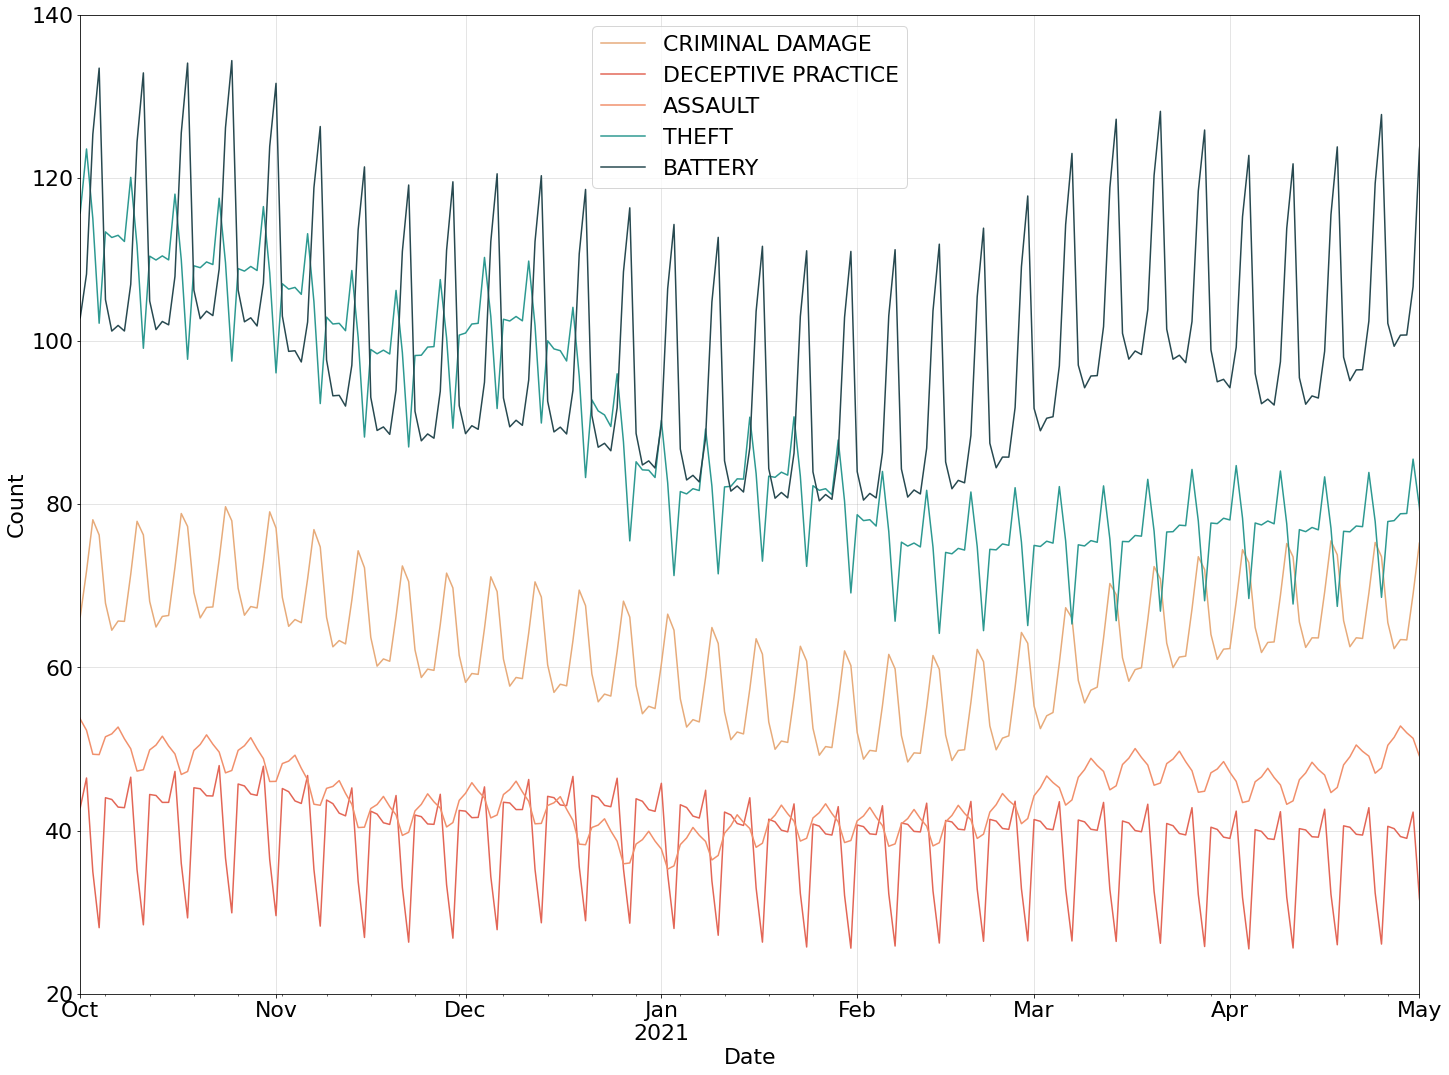

In [69]:



ax = cd_forecast.plot(x='ds', y='yhat', label='CRIMINAL DAMAGE', legend=True,xlim=('2020-10-01', '2021-05-01'),figsize=(20, 20), color='#E7AB7A')
ax.set_ylim(20,140)
ax1 = assault_forecast.plot(x='ds', y='yhat', label='DECEPTIVE PRACTICE', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax,figsize=(24, 18), color='#E36656')
ax2 = narcotics_forecast.plot(x='ds', y='yhat', label='ASSAULT', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax1,figsize=(24, 18), color='#F1906C')
ax3 = theft_forecast.plot(x='ds', y='yhat', label='THEFT', legend=True,xlim=('2020-10-01', '2021-05-01'), ax=ax2, figsize=(24, 18), color='#2D9991')
ax4 = battery_forecast.plot(x='ds', y='yhat', label='BATTERY', legend=True,xlim=('2020-10-01', '2021-05-01'),ax=ax3, figsize=(24, 18), color='#274950')  
ax4.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax4.set(xlabel = 'Date',ylabel = 'Count')




plt.show()

# Short term forecasting

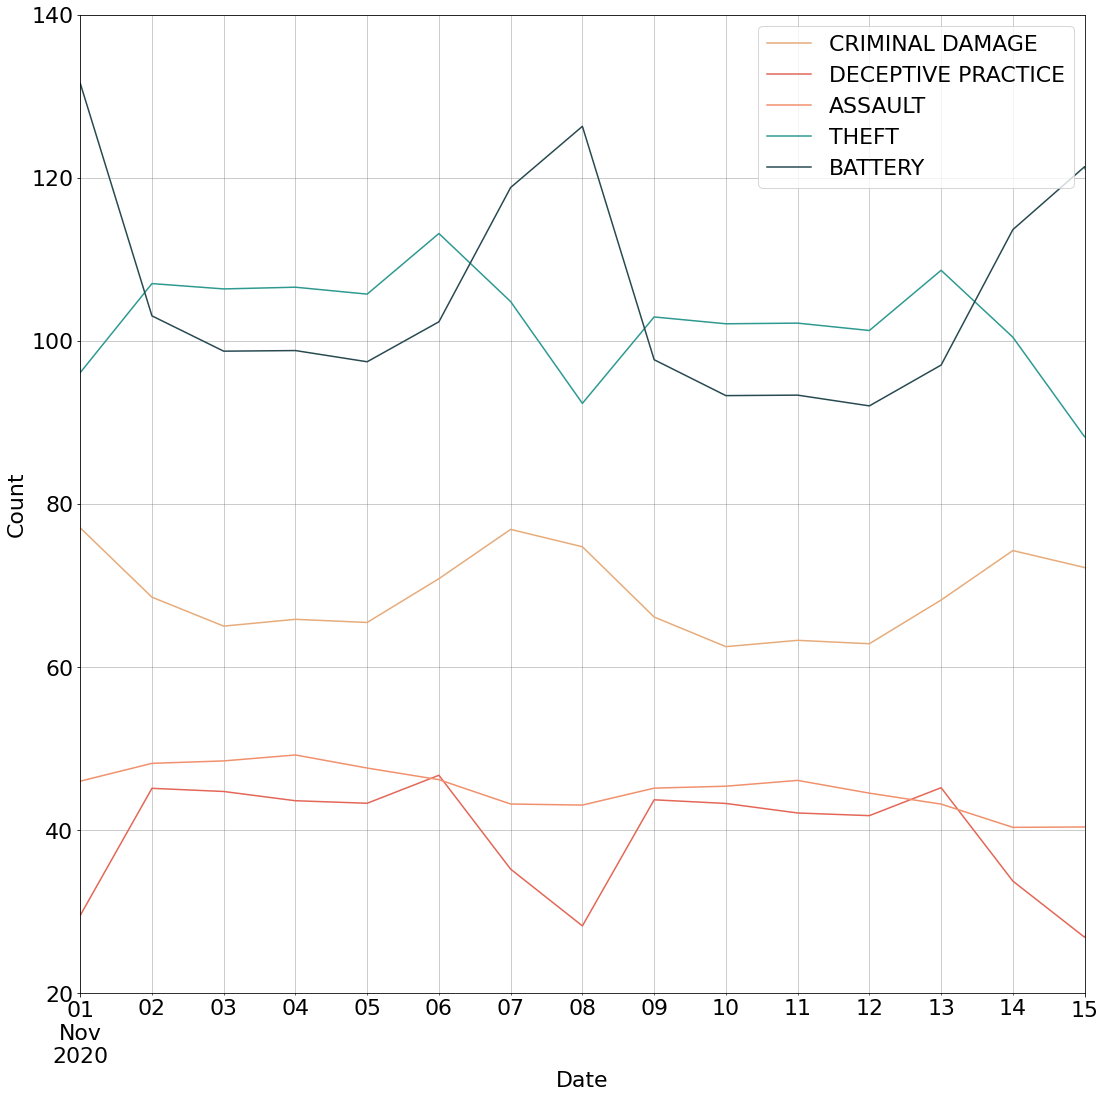

In [70]:
ax = cd_forecast.plot(x='ds', y='yhat', label='CRIMINAL DAMAGE', legend=True,xlim=('2020-11-01', '2020-11-15'),figsize=(18, 18), color='#E7AB7A')
ax.set_ylim(20,140)

ax1 = assault_forecast.plot(x='ds', y='yhat', label='DECEPTIVE PRACTICE', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax,figsize=(18, 18), color='#E36656')
ax2 = narcotics_forecast.plot(x='ds', y='yhat', label='ASSAULT', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax1,figsize=(18, 18), color='#F1906C')
ax3 = theft_forecast.plot(x='ds', y='yhat', label='THEFT', legend=True,xlim=('2020-11-01', '2020-11-15'), ax=ax2, figsize=(18, 18), color='#2D9991')
ax4 = battery_forecast.plot(x='ds', y='yhat', label='BATTERY', legend=True,xlim=('2020-11-01', '2020-11-15'),ax=ax3, figsize=(18, 18), color='#274950')
ax4.grid(True, which='both', c='gray', ls='-', lw=1, alpha=0.4)
ax4.set_ylabel('Count', fontsize=22)
ax4.set_xlabel('Date', fontsize=22)

plt.show()